# 代码实现

由于Mask R-CNN代码架构过于庞大，我们将直接调用相关接口进行效果展示。我们先导入必要的包。

In [ ]:
! git clone https://github.com/matterport/Mask_RCNN.git
! cd Mask_RCNN

import os
import sys
sys.path.append('Mask_RCNN')
os.chdir('./Mask_RCNN')
os.getcwd()

! python setup.py install

from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import cv2
import colorsys
import argparse
import imutils
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

接着，我们导入模型。这里，模型使用MS COCO数据集进行预训练。

In [ ]:
class SimpleConfig(Config):
    # 设定名称
    NAME = "coco_inference"
    # 设定GPU个数，指定每张GPU运行的图像张数
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # MS COCO数据集的类别数
    NUM_CLASSES = 81
    
    
config = SimpleConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights("mask_rcnn_coco.h5", by_name=True)


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

2023-01-05 12:27:25.556772: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-01-05 12:27:25.583159: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300090000 Hz
2023-01-05 12:27:25.589540: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x302a000 executing computations on platform Host. Devices:
2023-01-05 12:27:25.589584: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


最后，便可以使用Mask R-CNN进行实例分割。先导入一张图像，并使用Mask R-CNN对其进行实例分割。

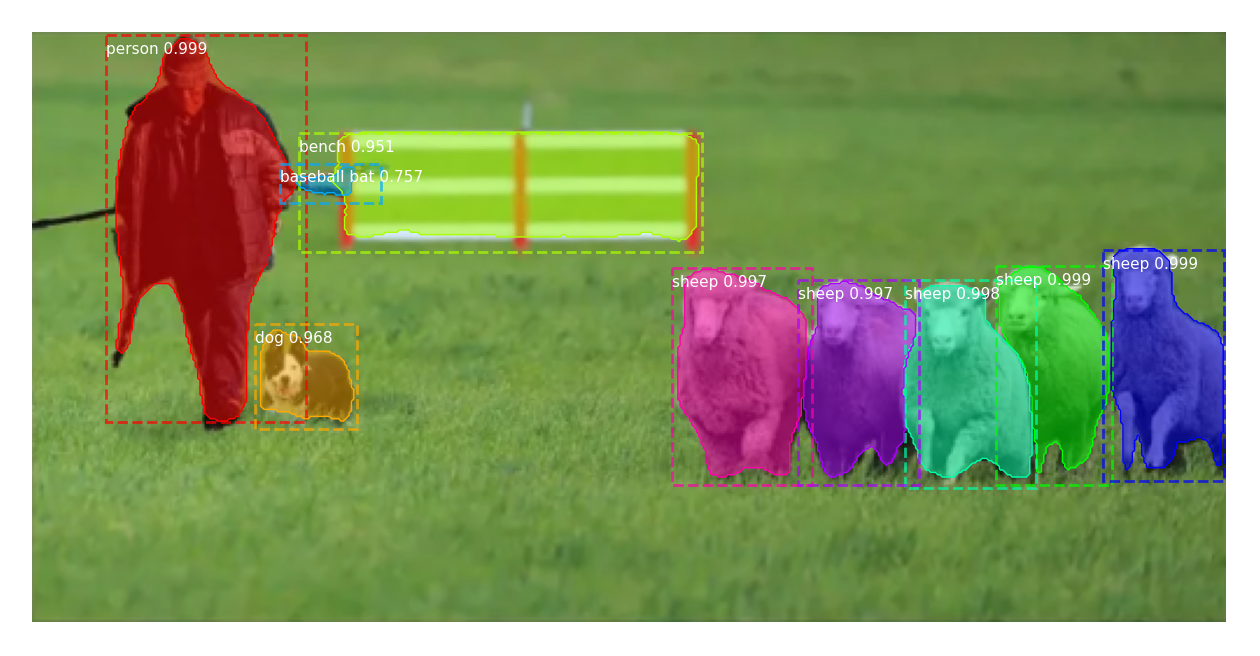

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 
               'airplane','bus', 'train', 'truck', 'boat', 
               'traffic light', 'fire hydrant', 'stop sign', 
               'parking meter', 'bench', 'bird', 'cat', 'dog', 
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
               'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 
               'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 
               'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 
               'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
               'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
               'book', 'clock', 'vase', 'scissors', 'teddy bear', 
               'hair drier', 'toothbrush']

image = cv2.imread('1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
# 进行前向传播，获得预测结果
print("[INFO] making predictions with Mask R-CNN...")
result = model.detect([image], verbose=1)

r1 = result[0]
visualize.display_instances(image, r1['ROIs'], r1['masks'], r1['class_ids'], class_names, r1['scores'])

可以观察到，Mask R-CNN可以捕捉到每一个独立的物体，并使用一个掩模来描述出该物体的具体形状。